Group Project - Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Sample Data

# Make sure the data is in the shared folder

# 1. Click the File Folder in the Sidebar
# 2. Navigate to "DTSC 3020 Project"
# 3. Find file and click menu "Copy Path"
# 4. Read in using pd.read_csv or other

df = pd.read_csv("/content/drive/MyDrive/DTSC 3020 Project/FastFoodNutrition.csv")
df.head()


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [ ]:
print("Length: ", len(df))
df.dtypes

Length:  1147


Company                  object
Item                     object
Calories                 object
Calories from\nFat       object
Total Fat\n(g)           object
Saturated Fat\n(g)       object
Trans Fat\n(g)           object
Cholesterol\n(mg)        object
Sodium \n(mg)            object
Carbs\n(g)               object
Fiber\n(g)               object
Sugars\n(g)              object
Protein\n(g)             object
Weight Watchers\nPnts    object
dtype: object

In [ ]:
df.tail()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
1142,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1144,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Large,260,NaN,9,4,0,20,510,36,3,3,11,NaN


In [ ]:
# Test for null values
df.isnull().sum()

Company                    0
Item                       0
Calories                   0
Calories from\nFat       505
Total Fat\n(g)            56
Saturated Fat\n(g)        56
Trans Fat\n(g)            56
Cholesterol\n(mg)          0
Sodium \n(mg)              0
Carbs\n(g)                56
Fiber\n(g)                56
Sugars\n(g)                0
Protein\n(g)              56
Weight Watchers\nPnts    260
dtype: int64

In [ ]:
#Test for nan values
df.fillna(0, inplace=True)  # Here, NaN values are filled with 0

df.isna().sum()

Company                  0
Item                     0
Calories                 0
Calories from\nFat       0
Total Fat\n(g)           0
Saturated Fat\n(g)       0
Trans Fat\n(g)           0
Cholesterol\n(mg)        0
Sodium \n(mg)            0
Carbs\n(g)               0
Fiber\n(g)               0
Sugars\n(g)              0
Protein\n(g)             0
Weight Watchers\nPnts    0
dtype: int64

In [ ]:
##Basic descriptive statistics
# converting object data to float numeric data which is what most of the data
# is supposed to be.
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df['Sodium \n(mg)'] = pd.to_numeric(df['Sodium \n(mg)'], errors='coerce')
df['Total Fat\n(g)'] = pd.to_numeric(df['Total Fat\n(g)'], errors='coerce')
df['Cholesterol\n(mg)'] = pd.to_numeric(df['Cholesterol\n(mg)'], errors='coerce')
df['Calories from\nFat'] = pd.to_numeric(df['Calories from\nFat'], errors='coerce')
df['Saturated Fat\n(g)'] = pd.to_numeric(df['Saturated Fat\n(g)'], errors='coerce')
df['Trans Fat\n(g)'] = pd.to_numeric(df['Trans Fat\n(g)'], errors='coerce')
df['Carbs\n(g)'] = pd.to_numeric(df['Carbs\n(g)'], errors='coerce')
df['Fiber\n(g)'] = pd.to_numeric(df['Fiber\n(g)'], errors='coerce')
df['Sugars\n(g)'] = pd.to_numeric(df['Sugars\n(g)'], errors='coerce')
df['Protein\n(g)'] = pd.to_numeric(df['Protein\n(g)'], errors='coerce')
df['Weight Watchers\nPnts'] = pd.to_numeric(df['Weight Watchers\nPnts'], errors='coerce')

df.dtypes

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

[Text(0.5, 1.0, 'Calories vs Fat')]

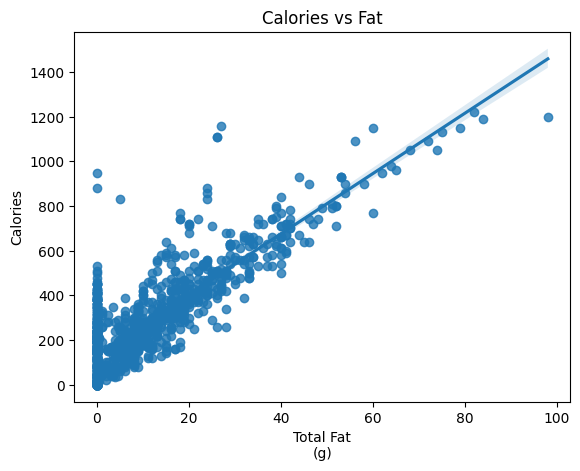

In [ ]:
sns.regplot(df, x='Total Fat\n(g)', y = 'Calories').set(title = "Calories vs Fat")

[Text(0.5, 1.0, 'Calories vs Protein')]

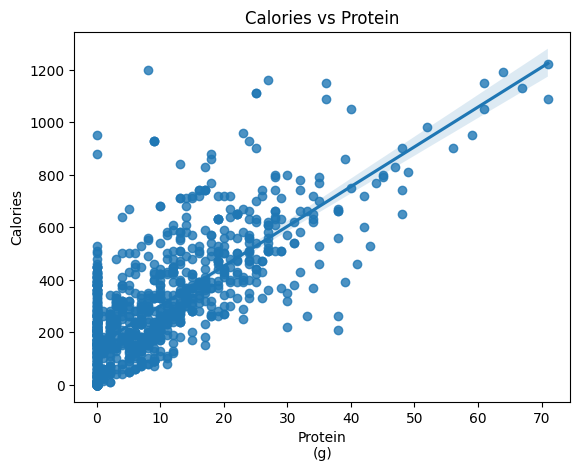

In [ ]:
sns.regplot(df, x='Protein\n(g)', y = 'Calories').set(title = "Calories vs Protein")

[Text(0.5, 1.0, 'Calories vs Carbs')]

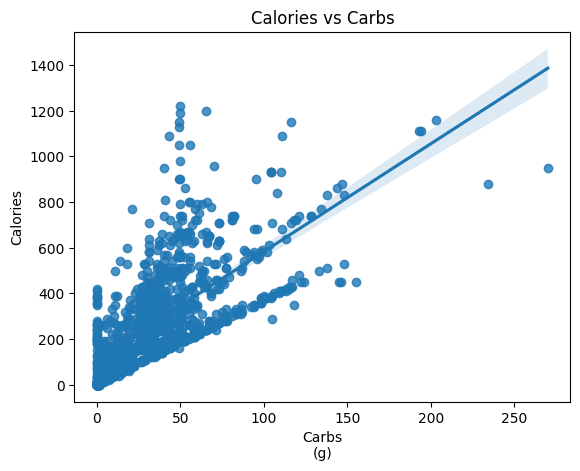

In [ ]:
sns.regplot(df, x='Carbs\n(g)', y = 'Calories').set(title = "Calories vs Carbs")

[Text(0.5, 1.0, 'Calories Distribution')]

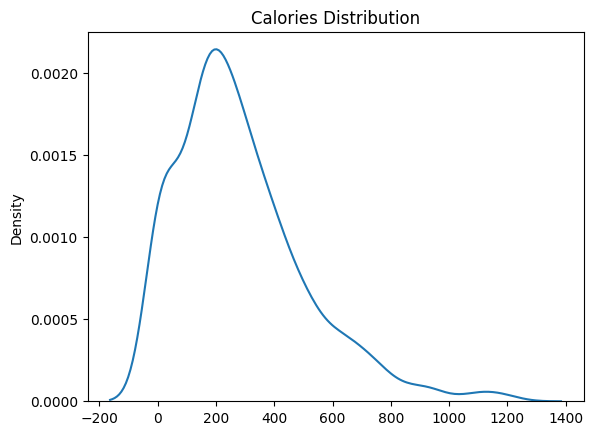

In [ ]:
# Calories Distribution
sns.kdeplot(np.array(df['Calories'])).set(title = "Calories Distribution")

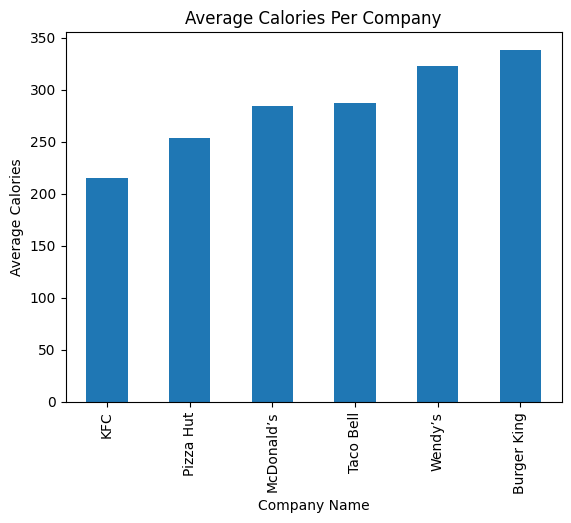

In [ ]:
calories_plot = (df
             .groupby(['Company'])['Calories']
             .mean()
             .sort_values()
             .plot(kind = "bar"))
# Plot Results
plt.title('Average Calories Per Company')
plt.ylabel('Average Calories')
plt.xlabel('Company Name')
plt.show()

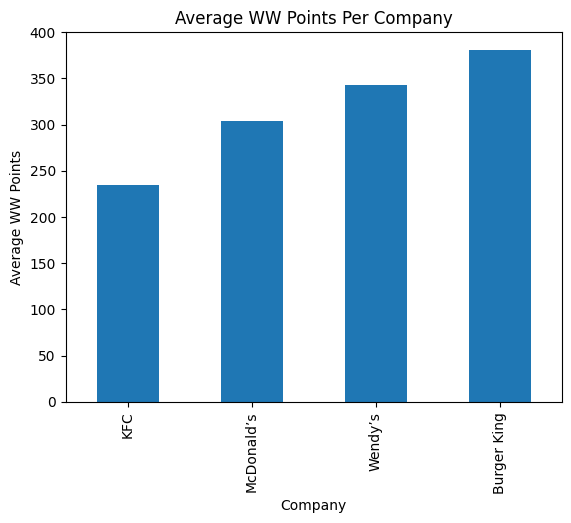

In [ ]:
df['Weight Watchers\nPnts']

points_plot = (df
             .groupby(['Company'])['Weight Watchers\nPnts']
             .mean()
             .sort_values()
             .loc[lambda x : x > 0]
             .plot(kind = "bar"))

# Plot Results (doesn't include Taco Bell or Pizza Hut)
plt.title('Average WW Points Per Company')
plt.ylabel('Average WW Points')
plt.xlabel('Company')
plt.show()